In [3]:
import numpy as np
x_list = [82,45,56,78,50,96,64,72]
y_list = [65,60,58,67,48,88,80,87]
def dispersion(x_list):
    sq_sum=np.sum([x**2 for x in x_list ])
    mean_sq=np.mean(x_list)**2
    return sq_sum/(len(x_list)-1)-mean_sq


In [4]:
def sampling_dis(x_list):
    print(np.mean(x_list))
    return np.sum([(x-np.mean(x_list))**2 for x in x_list])/(len(x_list)-1)

In [5]:
sampling_dis([2.82,3.01,3.24,3.16,3.34,3.57,2.98,3.28])

3.175


0.055714285714285716

In [7]:
def co_dispersion(x_list,y_list):
    mul_sum = np.sum([x*y for x,y in zip(x_list, y_list)])
    mean_mul= np.mean(x_list)*np.mean(y_list)
    return mul_sum/len(x_list) - mean_mul        

In [8]:
co_dispersion(x_list,y_list)

150.140625

In [20]:
def coorelation(x_list,y_list):
    return co_dispersion(x_list,y_list)/(np.sqrt(dispersion(x_list))*np.sqrt(dispersion(y_list)))

In [21]:
coorelation(x_list, y_list)

0.6824492605571192

In [24]:
def regression(x_list,y_list):
    a = coorelation(x_list,y_list)*np.sqrt(dispersion(y_list))/np.sqrt(dispersion(x_list))
    b = np.mean(y_list)-a*np.mean(x_list)
    return a,b

In [25]:
regression(x_list,y_list)

(0.5695572283800604, 30.466303123703398)

In [6]:
list_93=[25.3,29.2,31.4,26.8,32.3,24.3,27.6,28.5]
np.sum([(x-np.mean(list_93))**2/9 for x in list_93 ])

6.0083333333333275

In [12]:
from scipy import stats
x = stats.norm.rvs(size=500)
y = stats.cauchy.rvs(size = 500)
z = stats.t.rvs(3,size=500)
print(stats.kstest(x,"norm").pvalue)
print(stats.kstest(y,"norm").pvalue)
print(stats.kstest(z,"norm").pvalue)

0.7113432918389099
1.7429622189979455e-09
0.011434437707042111


Text(0.5,1,'values of two different poisson distribution ')

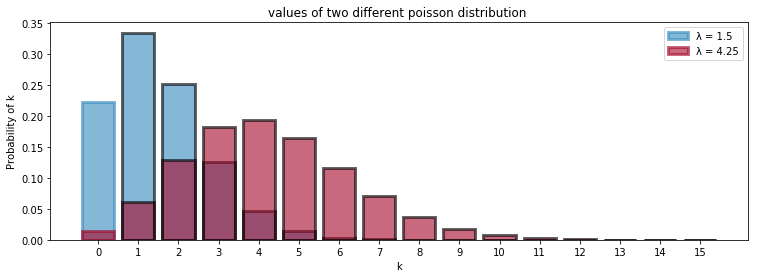

In [1]:
import numpy as np
import scipy.stats as stats
from IPython.core.pylabtools import figsize
import  matplotlib.pyplot  as plt
% matplotlib inline

figsize(12.5, 4)

poi = stats.poisson
lambda_ = [1.5, 4.25]
colors = ["#348ABD", "#A60628"]

a = np.arange(16)
plt.bar(a, poi.pmf(a,lambda_[0]), color=colors[0], #pmf = Probability Mass Function
       label="λ = {}".format(lambda_[0]),
       alpha=0.60, edgecolor=colors[0], lw="3")
plt.bar(a, poi.pmf(a,lambda_[1]), color=colors[1],
       label="λ = {}".format(lambda_[1]),
       alpha=0.60, edgecolor=colors[1], lw="3")

plt.xticks(a , a) # （位置, label）
plt.legend()
plt.ylabel("Probability of k")
plt.xlabel("k")
plt.title("values of two different poisson distribution ")

Text(0.5,1,'Probability density function of expo')

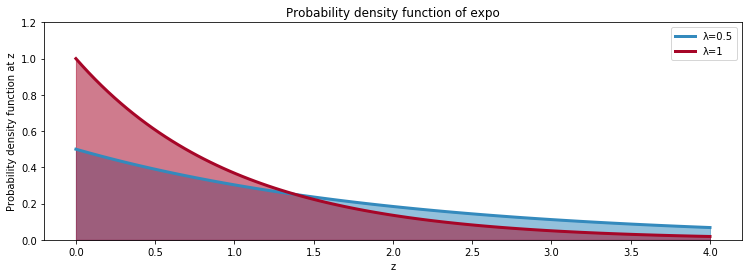

In [2]:
a = np.linspace(0, 4, 100)
expo = stats.expon
lambda_ = [0.5, 1]

for l, c in zip(lambda_, colors):
    plt.plot(a, expo.pdf(a, scale=1. / l),
    lw = 3, color=c, label="λ={}".format(l))
    plt.fill_between(a, expo.pdf(a, scale=1./l), color=c, alpha=.53)
    
plt.legend()
plt.ylabel("Probability density function at z")
plt.xlabel("z")
plt.ylim(0, 1.2)
plt.title("Probability density function of expo")

(0, 74)

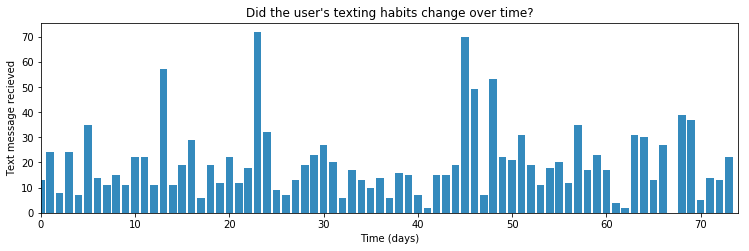

In [3]:
from os import makedirs
makedirs("data", exist_ok = True)

from urllib.request import urlretrieve
urlretrieve("https://git.io/vXTVC", "data/txtdata.csv")

figsize(12.5, 3.5)
count_data = np.loadtxt("data/txtdata.csv")
n_count_data = len(count_data)
plt.bar(np.arange(n_count_data), count_data, color="#348ABD")

plt.xlabel("Time (days)")
plt.ylabel("Text message recieved")
plt.title("Did the user's texting habits change over time?")
plt.xlim(0, n_count_data)

In [19]:
import pymc as pm

#変数 count_data が計数データを保持している

alpha = 1.0 / count_data.mean()
lambda_1 = pm.Exponential("lambda_1", alpha)
lamdba_2 = pm.Exponential("lambda_2", alpha)

tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data)

In [20]:
# 呼び出す練習
print("Random output:", tau.random(), tau.random(), tau.random())

Random output: 9 25 19


In [21]:
@pm.deterministic
def lambda_(tau=tau, lambda_1=lambda_1, lambda_2 = lamdba_2):
    out = np.zeros(n_count_data) # データの数
    out[:tau] = lambda_1 # tau より前のl ambda は lambda_1
    out[tau:] = lambda_2 # tau より前のl ambda は lambda_2
    return out

In [22]:
observation = pm.Poisson("obs", lambda_, value=count_data, observed=True)
model=pm.Model([observation, lambda_1, lamdba_2, tau])

In [23]:
mcmc = pm.MCMC(model)
mcmc.sample(40000,10000)

 [-----------------100%-----------------] 40000 of 40000 complete in 4.7 sec

Text(0,0.5,'Probability')

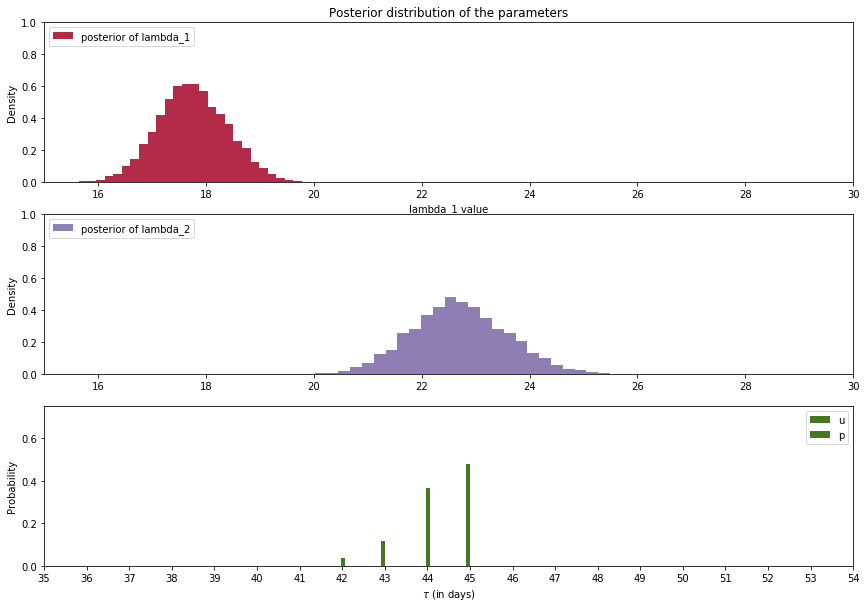

In [34]:
lambda_1_samples = mcmc.trace('lambda_1')[:]
lambda_2_samples = mcmc.trace('lambda_2')[:]
tau_samples = mcmc.trace('tau')[:]

figsize(14.5, 10)

# サンプルのヒストグラム
ax = plt.subplot(311)
ax.set_autoscaley_on(False)
plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85, color="#A60628", normed=True,
        label="posterior of lambda_1")
plt.legend(loc="upper left")
plt.title("Posterior distribution of the parameters")
plt.xlim([15,30])
plt.xlabel("lambda_1 value")
plt.ylabel("Density")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype="stepfilled", bins=30, alpha=0.85, color="#7A68A6", normed=True ,
label="posterior of lambda_2")
plt.legend(loc="upper left")
plt.xlim([15,30])
plt.ylabel("Density")

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1, label="posterior of tau" , color="#467821",
         weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data))
plt.legend('upper left')
plt.ylim([0, .75])
plt.xlim([35, len(count_data)-20])
plt.xlabel(r"$\tau$ (in days)")
plt.ylabel("Probability")

[ 17.75221177  17.75221177  17.75221177  17.75221177  17.75221177
  17.75221177  17.75221177  17.75221177  17.75221177  17.75221177
  17.75221177  17.75221177  17.75221177  17.75221177  17.75221177
  17.75221177  17.75221177  17.75221177  17.75221177  17.75221177
  17.75221177  17.75221177  17.75221177  17.75221177  17.75221177
  17.75221177  17.75221177  17.75221177  17.75221177  17.75221177
  17.75221177  17.75221177  17.75221177  17.75221177  17.75221177
  17.75221177  17.75221177  17.75221177  17.75222934  17.75222934
  17.75237424  17.75683583  17.92750133  18.46734908  20.28406908
  22.69708224  22.69708224  22.69708224  22.69708224  22.69708224
  22.69708224  22.69708224  22.69708224  22.69708224  22.69708224
  22.69708224  22.69708224  22.69708224  22.69708224  22.69708224
  22.69708224  22.69708224  22.69708224  22.69708224  22.69708224
  22.69708224  22.69708224  22.69708224  22.69708224  22.69708224
  22.69708224  22.69708224  22.69708224  22.69708224]


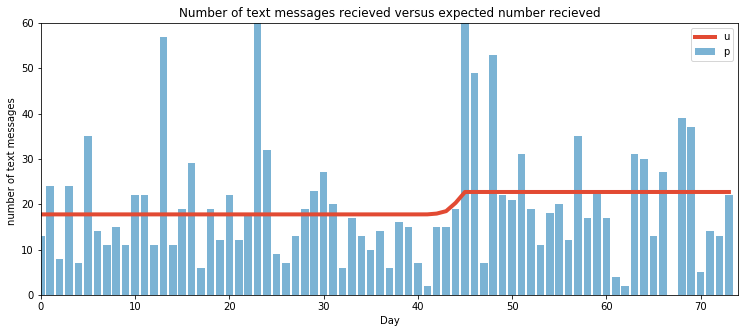

In [45]:
figsize(12.5, 5)
N = tau_samples.shape[0]
expected_texts_per_day = np.zeros(n_count_data)

for day in range(0, n_count_data):
    # ix は bool index 
    # true -> lmdba_1,  false -> lamdba_2
    ix = day < tau_samples
    expected_texts_per_day[day]=(lambda_1_samples[ix].sum() + lambda_2_samples[~ix].sum())/N
    
plt.plot(range(n_count_data), expected_texts_per_day, lw=4, color="#E24A33", 
        label="Expected number of text messages recieved")
plt.xlim(0, n_count_data)
plt.ylim(0, 60)
plt.xlabel("Day")
plt.ylabel("number of text messages ")
plt.title("Number of text messages recieved versus expected number recieved")
plt.bar(np.arange(len(count_data)), count_data, color="#348ABD", alpha=0.65,
       label="Observed text messages")
plt.legend("upper left")
print(expected_texts_per_day)

In [47]:
print((lambda_1_samples < lambda_2_samples).mean())


1.0


In [50]:
# lambda_1 と lambda_2 の差が1,2,5,10より大きい確率
for d in np.arange(10):
    v = (abs(lambda_1_samples - lambda_2_samples) >= d).mean()
    
    print("what is the probability the difference is larger than {}? - {}".format(d,v))

what is the probability the difference is larger than 0? - 1.0
what is the probability the difference is larger than 1? - 0.9997333333333334
what is the probability the difference is larger than 2? - 0.9976333333333334
what is the probability the difference is larger than 3? - 0.9622333333333334
what is the probability the difference is larger than 4? - 0.8075333333333333
what is the probability the difference is larger than 5? - 0.4784
what is the probability the difference is larger than 6? - 0.15863333333333332
what is the probability the difference is larger than 7? - 0.032433333333333335
what is the probability the difference is larger than 8? - 0.0024333333333333334
what is the probability the difference is larger than 9? - 0.0


In [52]:
lambda_1 = pm.Exponential("lambda_1", alpha)
lambda_2= pm.Exponential("lambda_2", alpha)
lambda_3= pm.Exponential("lambda_3", alpha)

tau_1 = pm.DiscreteUniform("tau_1", lower=0, upper=n_count_data-1)
tau_2 = pm.DiscreteUniform("tau_2", lower=tau_1, upper = n_count_data)

@pm.deterministic
def lambda_(tau_1=tau_1, tau_2=tau_2, lambda_1=lambda_1,lambda_2=lambda_2, lambda_3=lambda_3):
    out=np.zeros(n_count_data)
    out[:tau_1] = lambda_1
    out[tau_1:tau_2] = lambda_2
    out[tau_2:] = lambda_3
    return out

observation = pm.Poisson("obs", lambda_, value=count_data, observed = True)
model= pm.Model([observation, lambda_1, lambda_2, lambda_3, tau_1, tau_2])

mcmc = pm.MCMC(model)
mcmc.sample(40000,10000)


 [-----------------100%-----------------] 40000 of 40000 complete in 7.6 sec

Text(0,0.5,'Probability')

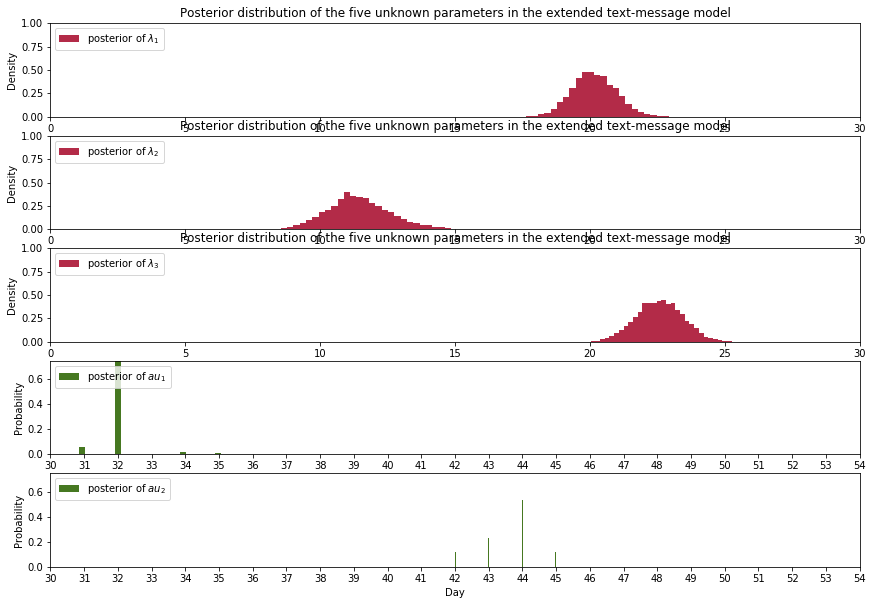

In [68]:
lambda_1_samples=mcmc.trace('lambda_1')[:]
lambda_2_samples=mcmc.trace('lambda_2')[:]
lambda_3_samples=mcmc.trace('lambda_3')[:]
tau_1_samples=mcmc.trace('tau_1')[:]
tau_2_samples=mcmc.trace('tau_2')[:]

figsize(14.5, 10)
ax=plt.subplot(511)
ax.set_autoscaley_on(False)
plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85, color='#A60628', normed=True, 
         label="posterior of $\lambda_1$")
plt.legend(loc="upper left")

plt.title('Posterior distribution of the five unknown parameters in the extended text-message model')
plt.xlim([0,30])
plt.xlabel("$\lambda_1$ value")
plt.ylabel("Density")

ax = plt.subplot(512)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=40, alpha=0.85, color='#A60628', normed=True, 
         label="posterior of $\lambda_2$")
plt.legend(loc="upper left")
plt.title('Posterior distribution of the five unknown parameters in the extended text-message model')
plt.xlim([0,30])
plt.xlabel("$\lambda_2$ value")
plt.ylabel("Density")

ax = plt.subplot(513)
ax.set_autoscaley_on(False)
plt.hist(lambda_3_samples, histtype='stepfilled', bins=40, alpha=0.85, color='#A60628', normed=True, 
         label="posterior of $\lambda_3$")
plt.legend(loc="upper left")
plt.title('Posterior distribution of the five unknown parameters in the extended text-message model')
plt.xlim([0,30])
plt.xlabel("$\lambda_3$ value")
plt.ylabel("Density")

plt.subplot(514)
w = 1.0/tau_1_samples.shape[0] * np.ones_like(tau_1_samples)
plt.hist(tau_1_samples, bins=n_count_data, alpha=1, label='posterior of $\tau_1$', color="#467821",
        weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data))
plt.legend(loc="upper left")
plt.ylim([0, .75])
plt.xlim([30, n_count_data-20])
plt.xlabel("Day")
plt.ylabel('Probability')

plt.subplot(515)
w = 1.0/tau_2_samples.shape[0] * np.ones_like(tau_2_samples)
plt.hist(tau_2_samples, bins=n_count_data, alpha=1, label='posterior of $\tau_2$', color="#467821",
        weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data))
plt.legend(loc="upper left")
plt.ylim([0, .75])
plt.xlim([30, n_count_data-20])
plt.xlabel("Day")
plt.ylabel('Probability')

In [72]:
# 演習問題
#1
print(lambda_1_samples.mean(), lambda_2_samples.mean())
# 2
print(((lambda_1_samples - lambda_2_samples)/lambda_1_samples).mean())
#3
ix = tau_samples < 45
print(lambda_1_samples[ix].mean())


20.1560597827 11.4459387425
0.431444801361
20.1592868927
